In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q keras

In [3]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [4]:
# Define ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [7]:
# Load training data
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Task2dataset/flowerdataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')  # Assuming binary classification for two types of flowers


Found 1099 images belonging to 2 classes.


In [10]:
# Define ImageDataGenerator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Load test data
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Task2dataset/flowerdataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')  # Assuming binary classification for two types of flowers


Found 2292 images belonging to 2 classes.


In [17]:
model = Sequential([
    # Build the CNN model
  #cnn = tf.keras.models.Sequential()
  Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]),
  MaxPool2D(pool_size=2, strides=2),
  Conv2D(filters=64, kernel_size=3, activation='relu'),
  MaxPool2D(pool_size=2, strides=2),
  Dropout(0.5),
  Flatten(),
  Dense(units=128, activation='relu'),
  Dense(units=1, activation='sigmoid')  # Binary classification, so 1 output neuron with sigmoid activation
])

In [23]:
# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
model.fit(x=training_set, validation_data=test_set, epochs=10)

Epoch 1/10
35/35 [==============================] - 829s 24s/step - loss: 0.7339 - accuracy: 0.6597 - val_loss: 0.4308 - val_accuracy: 0.8368
Epoch 2/10
35/35 [==============================] - 43s 1s/step - loss: 0.4644 - accuracy: 0.8162 - val_loss: 0.3390 - val_accuracy: 0.8617
Epoch 3/10
35/35 [==============================] - 39s 1s/step - loss: 0.3883 - accuracy: 0.8298 - val_loss: 0.3809 - val_accuracy: 0.8281
Epoch 4/10
35/35 [==============================] - 40s 1s/step - loss: 0.3358 - accuracy: 0.8471 - val_loss: 0.3437 - val_accuracy: 0.8582
Epoch 5/10
35/35 [==============================] - 38s 1s/step - loss: 0.3502 - accuracy: 0.8535 - val_loss: 0.4006 - val_accuracy: 0.8316
Epoch 6/10
35/35 [==============================] - 38s 1s/step - loss: 0.3203 - accuracy: 0.8590 - val_loss: 0.3565 - val_accuracy: 0.8455
Epoch 7/10
35/35 [==============================] - 38s 1s/step - loss: 0.2970 - accuracy: 0.8699 - val_loss: 0.2790 - val_accuracy: 0.8853
Epoch 8/10
35/35 [

1/1 [==============================] - 1s 622ms/step


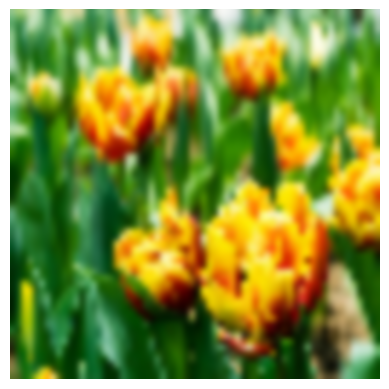

Tulip


In [27]:
# Get a random image and its label from the test set
test_image, true_label = test_set.next()

# Predict the class of the random image
result = model.predict(test_image)

# Display the random image
plt.imshow(test_image[0], interpolation='bicubic')
plt.axis('off')
plt.show()
# Print the predicted class
if result[0][0] > 0.5:
    print('Tulip')
else:
    print('Sunflower')

In [28]:
model.evaluate(training_set)

35/35 [==============================] - 12s 327ms/step - loss: 0.2569 - accuracy: 0.8954


[0.25694891810417175, 0.8953593969345093]

In [29]:
model.save('binary_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
